# CS381/780 Data Analytics Final Project

### Due on 12/9/2020 23:59 pm

In [1004]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Your task in the final project is build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped 100



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [1005]:
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


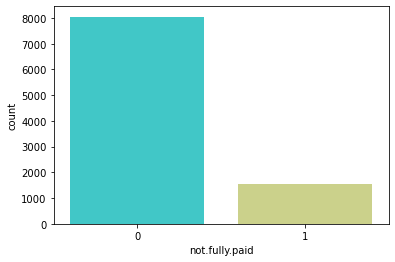

In [1006]:
sns.countplot(df['not.fully.paid'], palette='rainbow')

# EDA 
* chekcing missing values
* removing outliers

In [1007]:
df.shape

(9581, 14)

In [1008]:
df.isnull().sum()
# we have missing data at installment and log.annual.inc

credit.policy        0
purpose              0
int.rate             0
installment          1
log.annual.inc       1
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [1009]:
df[df['log.annual.inc'].isnull()]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
14,1,debt_consolidation,0.1324,NaN,NaN,9.16,666,4298.0,5122,18.2,2,1,0,0


In [1010]:
df[df.installment.isnull()]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
14,1,debt_consolidation,0.1324,NaN,NaN,9.16,666,4298.0,5122,18.2,2,1,0,0


In [1011]:
df.dropna(inplace=True)

In [1012]:
df.shape

(9580, 14)

# Performed basic exploration of relationship, with plots and graphs


In [1013]:
# overall
df.groupby('not.fully.paid').mean()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,
0,0.832360,0.120773,314.558964,10.941313,12.493584,713.279980,4592.559396,16119.990307,45.752759,1.434075,0.161799,0.056543
1,0.661448,0.132452,342.785114,10.885023,13.195838,697.828441,4393.541259,21066.293542,52.255075,2.330724,0.174821,0.091324


In [1014]:
df["credit.policy"].unique()

array([1, 0])

In [1015]:
df["delinq.2yrs"].unique() # integer values, the higher the worse.

array([ 0,  1,  2,  4,  3,  5,  6, 13,  7,  8, 11])

In [1016]:
df["pub.rec"].unique() # integer values, the higher the worse.

array([0, 1, 2, 3, 4, 5])

## Observations
### The (1) case represent not fully paid. let's see what features they have compare to the (0) case.
* #### credit.policy: the number is smaller means there are more 0 count towards the total -> (the borrower are not qualified tends to default.) 
* #### int.rate: they tends to have higher interest rate
* #### installment: monthly payment owed by the borrower. they owed more.
* #### log.annual.inc: lower self-reported income.
* #### dti: higher Debt-to-Income ratio
* #### fico: lower FICO score of loan borrowers
* #### days.with.cr.line: less number of days with line of credit. less time to pay back.
* #### revol.bal: high revolving balance -> the portion of credit that remains unpaid after billing cycle. not good!
* #### revol.util: high revolving utilization -> debt-to-limit ratio, debt divided by credit limit.
* #### inq.last.6mths: try to get more money. ( bad cashflow! ) -> number of ‘hard pulls’ during last 6 months.
* #### delinq.2yrs: higher number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* #### pub.rec: higher number of derogatory public records of loan borrowers.

In [1017]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

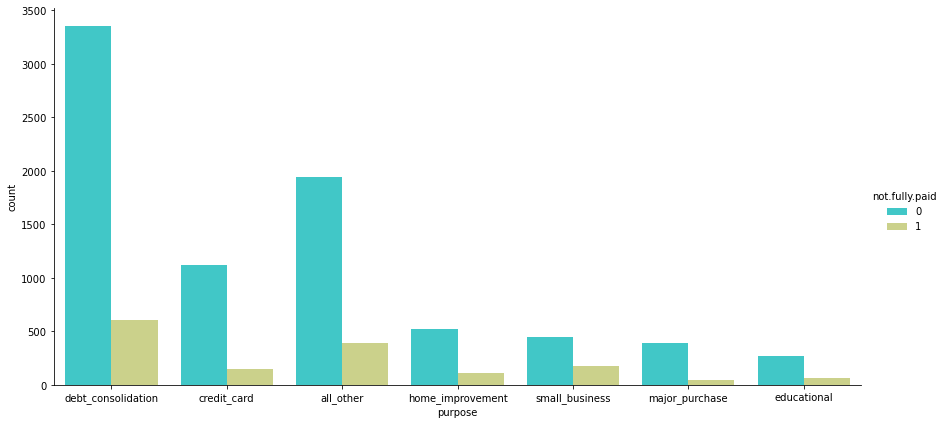

In [1018]:
sns.factorplot('purpose', data=df, palette='rainbow', hue='not.fully.paid', kind='count',size=6, aspect=2)

In [1019]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294040,0.058735,0.035048,-0.090947,0.341439,0.099013,-0.187547,-0.104183,-0.535476,-0.076141,-0.054266,-0.158157
int.rate,-0.294040,1.000000,0.276109,0.056481,0.219959,-0.702092,-0.124028,0.092498,0.464709,0.202791,0.156155,0.098142,0.159513
installment,0.058735,0.276109,1.000000,0.447900,0.050233,0.084782,0.183302,0.233643,0.081412,-0.010431,-0.004468,-0.032743,0.049982
log.annual.inc,0.035048,0.056481,0.447900,1.000000,-0.054205,0.110976,0.336788,0.371944,0.054561,0.029223,0.029659,0.016430,-0.033565
dti,-0.090947,0.219959,0.050233,-0.054205,1.000000,-0.236266,0.060110,0.188777,0.337169,0.029168,-0.021946,0.006233,0.037405
fico,0.341439,-0.702092,0.084782,0.110976,-0.236266,1.000000,0.259155,-0.014916,-0.530336,-0.182094,-0.213867,-0.144651,-0.146485
days.with.cr.line,0.099013,-0.124028,0.183302,0.336788,0.060110,0.259155,1.000000,0.229349,-0.024215,-0.041740,0.081320,0.071831,-0.029226
revol.bal,-0.187547,0.092498,0.233643,0.371944,0.188777,-0.014916,0.229349,1.000000,0.203828,0.022380,-0.033346,-0.030992,0.053729
revol.util,-0.104183,0.464709,0.081412,0.054561,0.337169,-0.530336,-0.024215,0.203828,1.000000,-0.013918,-0.043040,0.066758,0.082168
inq.last.6mths,-0.535476,0.202791,-0.010431,0.029223,0.029168,-0.182094,-0.041740,0.022380,-0.013918,1.000000,0.021301,0.072663,0.149431


0.12264209812108438
0.1221


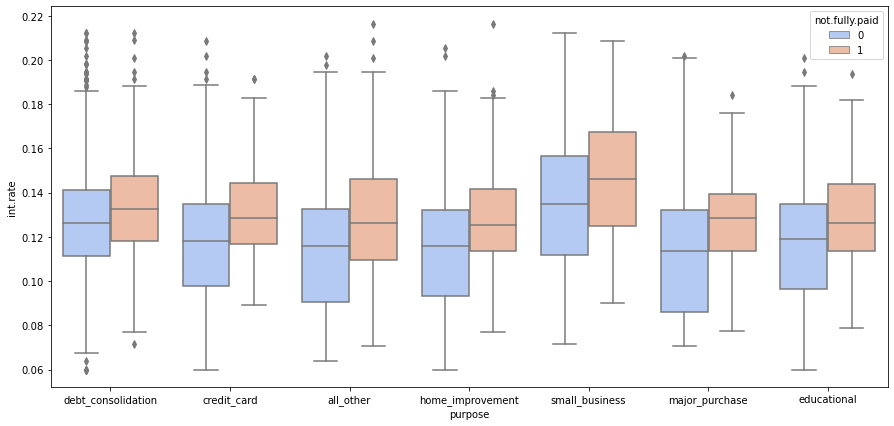

In [1020]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose',y='int.rate', data=df, palette='coolwarm', hue='not.fully.paid')
# small businesses have higher chances to default. the more risky, the higher the interests rate they would have.
# high interest rate in the group of small_business tends to get 1 label, not fully paid.
# int.rate outlier really depends on categories. not remove for now, because it's the real data. less sample doesn't mean it's wrong.
# purpose is an important feature.
var='int.rate'
print(df[var].mean())
print(df[var].median())

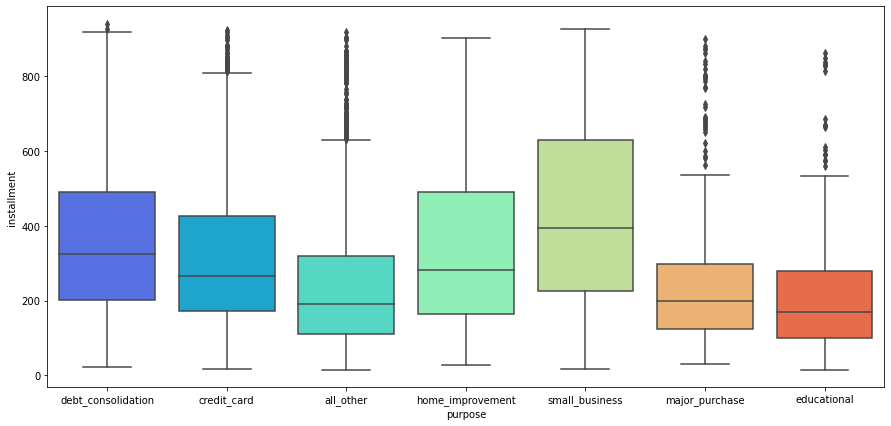

In [1021]:
# installment: range varys on categories.
plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose', y='installment',data=df,palette='rainbow')


10.932305632961366
10.929887445


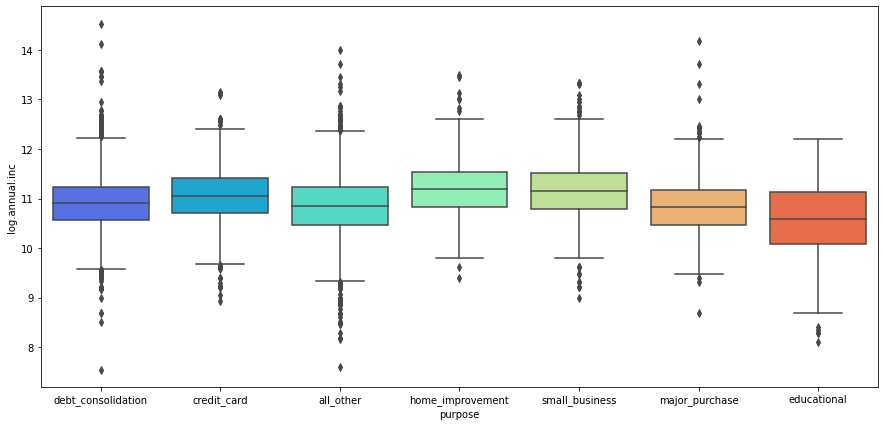

In [1023]:
# log.annual.inc
plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose', y='log.annual.inc',data=df,palette='rainbow')
var='log.annual.inc'
print(df[var].mean())
print(df[var].median())
# don't remove outliers, incomes can be vary. higher and lower income can be real. not enough sample.

In [1024]:
df[(df['log.annual.inc']<8) | (df['log.annual.inc']> 14)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
656,1,debt_consolidation,0.1229,281.84,14.528354,0.13,672,1293.041667,8747,51.8,1,0,0,0
5496,1,debt_consolidation,0.0774,206.05,14.124465,0.62,782,4709.958333,20,0.1,2,0,0,0
5794,1,major_purchase,0.0740,198.78,14.180154,0.00,772,5071.000000,2926,13.0,0,0,0,0
7825,0,debt_consolidation,0.1722,64.38,7.547502,18.99,642,450.000000,702,87.7,0,0,0,0
7900,0,all_other,0.0901,15.91,7.600902,0.00,702,238.958333,0,0.0,6,0,0,1


710.8074112734864
707.0


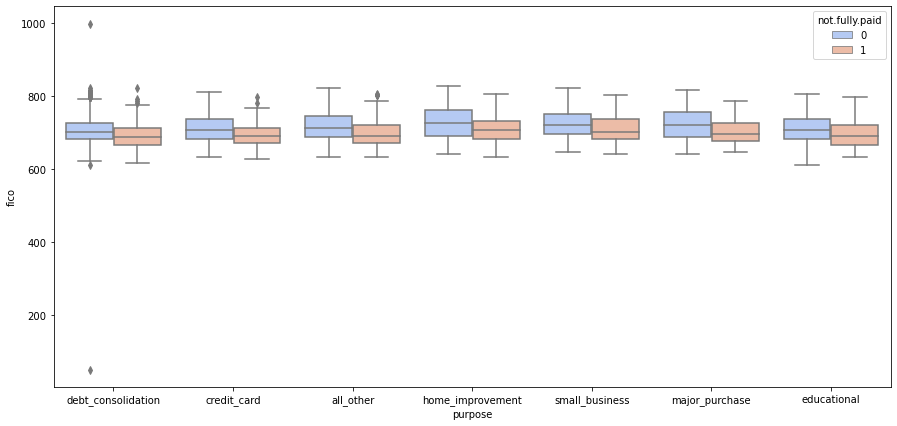

In [1025]:
# fico
# The generic FICO® Score has a score range of 300 to 850.
# out of this range are outliers. must remove.
# no fully paid borrower tends to have lower fico for all categories.

plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose', y='fico',data=df,palette='coolwarm', hue='not.fully.paid')
var='fico'
print(df[var].mean())
print(df[var].median())

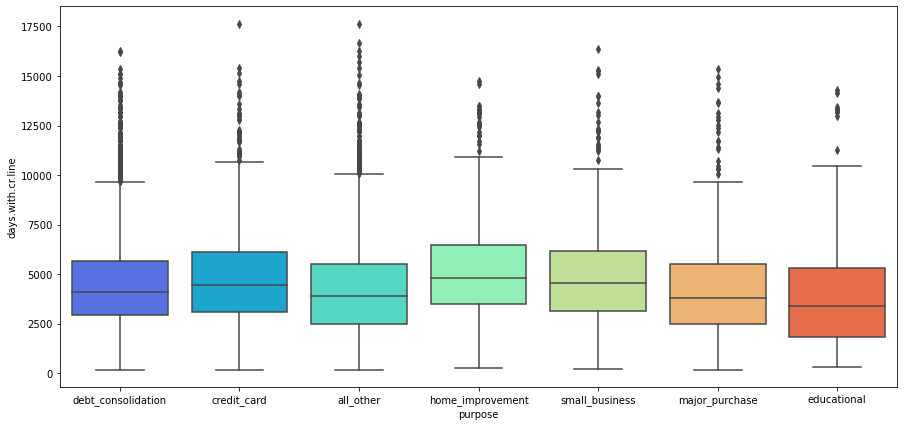

In [1026]:
# days.with.cr.line
plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose', y='days.with.cr.line',data=df,palette='rainbow')

In [1027]:
df[df['days.with.cr.line']>10000] 
# 10000 days = 27 years
# 17500 days = 48 years


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
24,1,all_other,0.0863,474.42,10.819778,2.59,797,11951.00000,5656,27.6,0,0,0,0
58,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.95833,17214,8.1,2,1,0,0
95,1,debt_consolidation,0.0870,383.87,11.918391,4.80,767,13349.95833,61921,39.1,0,0,0,0
99,1,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.00000,107501,44.8,2,0,0,0
116,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.00000,50,0.3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9461,0,home_improvement,0.1739,537.71,10.915088,5.78,767,12930.04167,13584,48.5,9,0,0,0
9494,0,small_business,0.1426,514.59,11.289782,17.86,782,11220.00000,235868,17.5,0,0,0,0
9543,0,debt_consolidation,0.1311,192.35,11.002100,5.72,692,10236.00000,2077,1.1,4,3,0,1
9563,0,all_other,0.1867,547.36,11.407565,15.76,667,10050.04167,13255,88.4,7,0,0,0


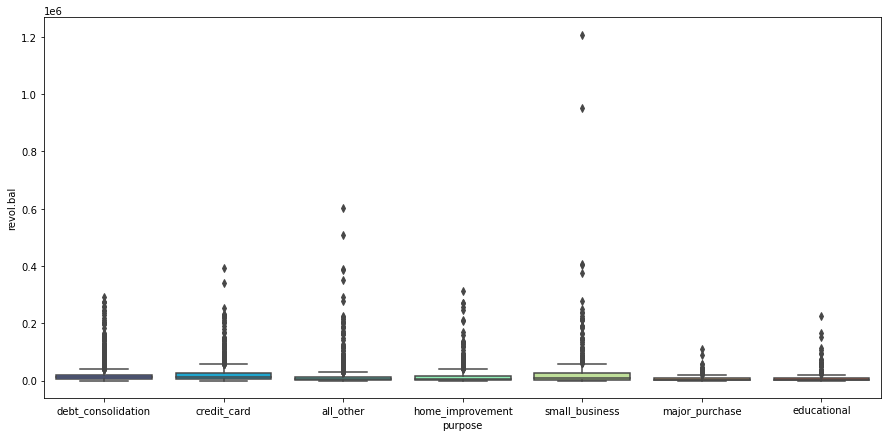

In [1028]:
# revol.bal
plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose', y='revol.bal',data=df,palette='rainbow')

In [1029]:
df[df['revol.bal'] > 600000]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9045,0,small_business,0.2011,735.06,13.304685,14.39,672,7620.000000,952013,99.0,6,0,0,0
9310,0,all_other,0.1287,168.17,12.594731,9.27,692,6330.000000,602519,68.4,4,0,1,0
9538,0,small_business,0.1496,831.52,12.765688,11.38,717,8520.041667,1207359,56.0,7,0,0,1


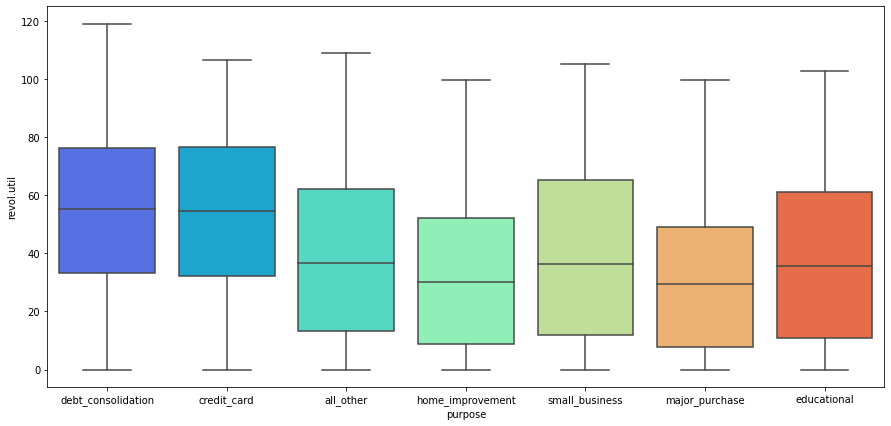

In [1030]:
# revol.util: no outliers here, we good. 
plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose', y='revol.util',data=df,palette='rainbow')

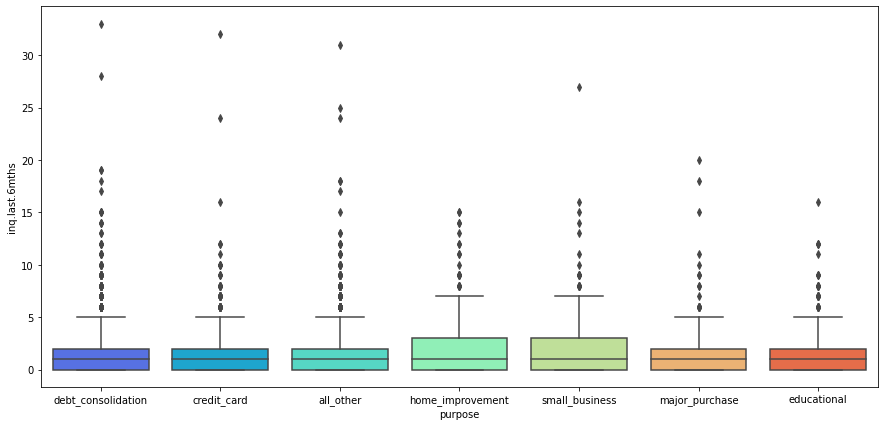

In [1031]:
# inq.last.6mths
# too many 'hard pull' sounds not realistic, over 20 times in 180 days? really? 'hard pull' 
# over 7 times a month? only make sense if it contains 'soft pull'.

plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose', y='inq.last.6mths',data=df,palette='rainbow')

In [1032]:

df[df['inq.last.6mths']>20]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7717,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1
8021,0,small_business,0.1028,155.52,10.308953,8.96,682,719.000000,6893,15.4,27,0,0,0
8023,0,all_other,0.1091,163.49,12.483704,8.30,677,7080.041667,2053,2.6,25,0,0,1
8029,0,debt_consolidation,0.1375,102.17,10.596635,16.71,642,1799.000000,9135,76.8,28,0,0,0
8040,0,all_other,0.1217,99.89,10.212001,14.85,662,2820.000000,0,0.0,31,0,1,0
8065,0,all_other,0.1438,46.39,11.002100,21.34,642,5880.000000,25254,53.1,24,0,0,0
8378,0,credit_card,0.1292,100.97,10.596635,15.73,662,1904.000000,7784,65.4,24,0,0,0
8412,0,credit_card,0.1324,172.43,9.740969,6.99,657,780.000000,5734,59.1,32,0,0,1


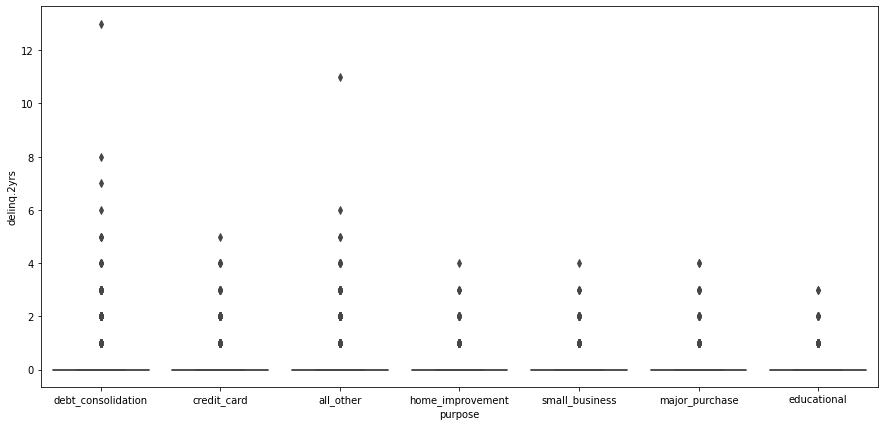

In [1033]:
# delinq.2yrs
plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose', y='delinq.2yrs',data=df,palette='rainbow')

In [1034]:
# I don't think we should remove outliers from delinq.2yrs, it could happend on small amount of people, less data doesn't mean it's wrong.
df[df['delinq.2yrs']>8]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7792,0,debt_consolidation,0.1407,171.05,10.714418,0.53,642,2846.000000,123,41.0,6,13,0,0
8551,0,all_other,0.1861,291.68,12.301383,6.87,647,4049.958333,378,5.0,0,11,1,0


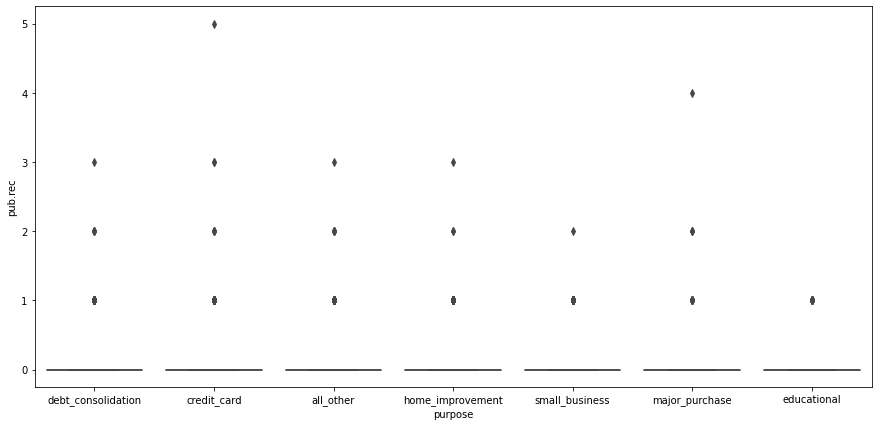

In [1035]:
# pub.rec
plt.figure(figsize=(15, 7))
sns.boxplot(x='purpose', y='pub.rec',data=df,palette='rainbow')

### Remove Outliers

In [1036]:
# The generic FICO® Score has a score range of 300 to 850.
# out of this range are outliers.

df2 = df[(df['fico']<=850) & (df['fico']>=300)]
# df3 = df2[df2['days.with.cr.line']<=10000]
df6 = df2[df2['inq.last.6mths']<20]

df6.shape

(9569, 14)

In [1037]:
df6.reset_index(inplace=True)

## Normalize numerical features 

In [1038]:
col = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

In [1039]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df6[col])
normalized_df = pd.DataFrame(normalized_df, columns = col)
normalized_df.shape

(9569, 12)

## Setup dummy variables to take care categorical variables

In [1040]:
# create dummies variable 
dummies = pd.get_dummies(df6.purpose, drop_first=True)
# df7 = df6[col].join(dummies)
df7 = pd.concat([normalized_df, dummies], axis=1)
df7.shape

(9569, 18)

## Split data set into training and testing
## Perform the learning process with Cross-Validations

In [1041]:
import random

# 1 LogisticRegression
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(df7, df6['not.fully.paid'], test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print (classification_report(y_test,y_pred))
    print("accuracy_score: " + str(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1595
           1       0.60      0.04      0.07       319

    accuracy                           0.84      1914
   macro avg       0.72      0.52      0.49      1914
weighted avg       0.80      0.84      0.77      1914

accuracy_score: 0.835423197492163
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1591
           1       0.54      0.02      0.04       323

    accuracy                           0.83      1914
   macro avg       0.69      0.51      0.47      1914
weighted avg       0.78      0.83      0.76      1914

accuracy_score: 0.831765935214211
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1582
           1       0.58      0.03      0.06       332

    accuracy                           0.83      1914
   macro avg       0.70      0.51      0.48      1914
weight

In [1042]:
# support vector machine, f1 score are higher then other models.
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(df7, df6['not.fully.paid'], test_size=0.2, random_state = random.randint(1,1000))
    model2 = svm.SVC(kernel='rbf', C=10, gamma=10)
    model2.fit(x_train, y_train)
    y_pred2 = model2.predict(x_test)
    print (classification_report(y_test,y_pred2))
    print("accuracy_score: " + str(accuracy_score(y_test, y_pred2)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1587
           1       0.29      0.14      0.19       327

    accuracy                           0.80      1914
   macro avg       0.57      0.54      0.54      1914
weighted avg       0.75      0.80      0.76      1914

accuracy_score: 0.7951933124346917
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1617
           1       0.23      0.14      0.18       297

    accuracy                           0.79      1914
   macro avg       0.54      0.53      0.53      1914
weighted avg       0.76      0.79      0.77      1914

accuracy_score: 0.7936259143155695
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1621
           1       0.20      0.12      0.15       293

    accuracy                           0.79      1914
   macro avg       0.52      0.52      0.51      1914
weig

In [1043]:
# Random Forest
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(df7, df6['not.fully.paid'], test_size=0.2, random_state = random.randint(1,1000))
    
    rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
    rfc.fit(x_train, y_train)

    rfc_pred = rfc.predict(x_test)
    print(classification_report(y_test, rfc_pred))
    print(accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1597
           1       0.53      0.03      0.05       317

    accuracy                           0.83      1914
   macro avg       0.69      0.51      0.48      1914
weighted avg       0.79      0.83      0.77      1914

0.8349007314524556
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1622
           1       0.50      0.02      0.04       292

    accuracy                           0.85      1914
   macro avg       0.67      0.51      0.48      1914
weighted avg       0.80      0.85      0.78      1914

0.8474399164054337
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1647
           1       0.46      0.02      0.04       267

    accuracy                           0.86      1914
   macro avg       0.66      0.51      0.48      1914
weighted avg       0.81      0.86   

### Overall, support vector machine yield the best result in terms of f1 scores.
### The improvement I can think of is to build the model for each "purpose". Because borrowers in different "purpose" categories thends to have different ranges of each features. Then we can get more accurate result by removing more outliers by each category.  

* this is the end of the report.